# TATR: Finding Hashtag Popularity 

This notebook is part of a greater series of Jupyter Notebooks structured around Twitter Tweet analysis. This particular notebook will look at finding the most popular hashtag for a given date. This notebook will showcase two main features with the end goal of finding the most popular hashtag by date. The first feature is collapsing all the tokenized hashtags of a date into a larger set. The second feature is to save the "tokenized list" into a csv and load it back such that Panda dataframes can still treat this as a list. This notebook will also provide a framework that can be expanded to suit your needs.

Any additional assumptions and clarification will be discussed and declared throughout the notebook.

### Note: 
This notebook will use concepts found in the TATR notebook series

Written 2018.

## Import Libraries

Now we will import all the Python 3 libraries that will be used in this notebook. You do not need to know all the functionalities of each library as some are massive. However, any functionalities that are used will be explained as they appear, therefore do not worry too much if you do not recognize the libraries. 

To import or download the required libraries see the Jupyter documentation or the libraries' home page for instruction. 

### Note: 
All libraries that are used are available for Anaconda 

In [35]:
# Importing data structure libraries
import pandas as pd
import numpy as np

# Import text analysis tools
import re
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import TweetTokenizer

# Import Counter
from collections import Counter

# Import libraries for loading files
import ast

# Import graphing tools
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Ensure that any graphs produced appear in the notebook (Vital)
%matplotlib inline

## Setting up some dummy data

Similar to before, this notebook will create a small set of dummy data to demostrate. This is to ensure that all those using this notebook have the ability to test out its functionality. However, we will be making some modification and changes to the one made in the the other notebook.

### Dummy Panda Dataframe Structure

We are going to create 5 sets of 5 entries. Each entry will have 2 values (Date, Hashtag). To find out how to generate these values see TATR Tokenization and Extraction. 

We will use 1 function to help create the Date
* pd.Timestamp(Some date format) : Which turns the input into a date 
* np.random.randint(range, how many) : Creates a random integer from 0 to range for the declared amount

### Note:

We will be randomly assigning hashtags to each date. Therefore, it is possible your results will be different each time.

In [36]:
# Set up empty dataframe
DummyDataframe = pd.DataFrame(columns=['Date', 'Hashtag'])

# Set up 3 different dates
dummyDates = [ pd.Timestamp('20180101'),  pd.Timestamp('20180201'),  pd.Timestamp('20180301')]

# List of hashtag we are going to use
dummyHashtags = ["Twitter","New2018", "JupyterLearning", "TwitterApp", "GenericTwitterNews"]

# Create 15 entries and assigning a random amount of hashtags to it
for i in range(15):
    DummyDataframe.loc[i] = [dummyDates[i % 3], [dummyHashtags[np.random.randint(5)] for x in range(np.random.randint(5))] ]
    
# See what the dataframe looks like
DummyDataframe

,Date,Hashtag
0,2018-01-01,"[TwitterApp, New2018]"
1,2018-02-01,"[GenericTwitterNews, GenericTwitterNews, Twitter]"
2,2018-03-01,"[TwitterApp, JupyterLearning, GenericTwitterNews]"
3,2018-01-01,[]
4,2018-02-01,"[Twitter, Twitter, JupyterLearning, Twitter]"
5,2018-03-01,[]
6,2018-01-01,[]
7,2018-02-01,"[New2018, New2018, New2018]"
8,2018-03-01,"[New2018, Twitter]"
9,2018-01-01,"[New2018, Twitter, TwitterApp, GenericTwitterN..."


Similar to previous notebooks (TATR: Graphing), we are going to sort the dates to make the data more readable for us. In addition we are going to take all the hashtags of each date and collapse them into a larger list.

In [37]:
# Set index to Date
DummyDataframe = DummyDataframe.set_index("Date")

# Group by date and then sum (add together) all the hashtag of a single date
DummyDataframe = DummyDataframe[["Hashtag"]].groupby('Date').agg({'Hashtag': 'sum'})

# Look at the data
DummyDataframe

,Hashtag
Date,
2018-01-01,"[TwitterApp, New2018, New2018, Twitter, Twitte..."
2018-02-01,"[GenericTwitterNews, GenericTwitterNews, Twitt..."
2018-03-01,"[TwitterApp, JupyterLearning, GenericTwitterNe..."


As you can see they added together all the individual lists of hashtags into a single list. We can now find out what is the most popular of each date. To do so we are going to first write a function that counts the occurrence of each hashtag. Afterwards, we are going to use Panda's apply and lamda features to change the panda dataframe.

In [38]:
"""
Helper function to get the most popular hashtag

:dataframe     = The dataframe of the data
:column        = Columns to be used for the data
"""
def most_popular_hashtag(dataframe, column):
    
    # Calculates what is most popular
    popular = max(set(dataframe[column]), key=dataframe[column].count)
    
    # Assigns the values
    dataframe["most_popular_hashtag"] = popular
    
    return dataframe

Now that we declared the function we are going to apply it using Panda apply and lamda feature

In [39]:
# Now lets save the top most popular word by day into their own column
DummyDataframe = DummyDataframe.apply(lambda x: most_popular_hashtag(x, "Hashtag"), axis = 1)

# Print out the first 5 entry
DummyDataframe

,Hashtag,most_popular_hashtag
Date,,
2018-01-01,"[TwitterApp, New2018, New2018, Twitter, Twitte...",GenericTwitterNews
2018-02-01,"[GenericTwitterNews, GenericTwitterNews, Twitt...",New2018
2018-03-01,"[TwitterApp, JupyterLearning, GenericTwitterNe...",JupyterLearning


In [40]:
"""
Helper function to get the most popular hashtag

:dataframe     = The dataframe of the data
:column        = Columns to be used for the data
"""
def most_popular_hashtag_percent(dataframe, column):
    
    # Calculates what is most popular
    popular = max(set(dataframe[column]), key=dataframe[column].count)
    
    # Assigns the values
    dataframe["most_popular_hashtag"] = popular
    
    # Calculate the percent of the popular hashtag and round it to two decimal place 
    dataframe["popular_hashtag_percent"] = "%.2f" % ((Counter(dataframe[column])[popular] / len(dataframe[column])) * 100)
    
    return dataframe

Now that we declared a new version of the previous function we will see what it looks like.

In [41]:
# Let's save the top most popular word by day into their own column
DummyDataframe = DummyDataframe.apply(lambda x: most_popular_hashtag_percent(x, "Hashtag"), axis = 1)

# Print out the first 5 entries
DummyDataframe

,Hashtag,most_popular_hashtag,popular_hashtag_percent
Date,,,
2018-01-01,"[TwitterApp, New2018, New2018, Twitter, Twitte...",GenericTwitterNews,30.00
2018-02-01,"[GenericTwitterNews, GenericTwitterNews, Twitt...",New2018,30.77
2018-03-01,"[TwitterApp, JupyterLearning, GenericTwitterNe...",JupyterLearning,33.33


As you can see we now have a percent associated with the most popular hashtag. Giving us more insight on how "popular" the most popular hashtag is overall.

## Saving our results

Now that we have our results we want to save what we have done. However, this is different than what was done in previous notebooks. The reason for this is because we have been using "list" to store the results. When this is converted into a CSV it will be saved as it appears in the panda dataframe. This is problematic when loading the csv back in. This is because when we are loading the csv the program does "not know" that it is suppose to be a "list". Therefore, we are going to have to alter the save function made in TATR Panda and CSV of Tweets. We are going to use the same "save" function (with a slight modification for index), however we are going to change out the load function.

Using the function "ast.literal_eval" we can interpret the string of characters as a list. 

To find out more about this function see:
* https://docs.python.org/2/library/ast.html

In [42]:
'''
Save the dataframe into a file

:dataframe: The dataframe that is being saved
:name_of_file:    The name of the CSV file you wish to save it as
:index: If you want to save the index set to true
'''
def save_frame_to_CSV(dataframe, name_of_file, index_save):
    
    print("Begin saving dataframe into a csv...\n")
    
    # Attach the CSV file extension to the name
    name = name_of_file + ".csv"
    
    # Convert the dataframe into a CSV that is separated by commas
    # Remove "index=False" if you want to save the index
    dataframe.to_csv(name, sep=',', encoding='utf-8', index=index_save)
    
    print("Finish and saved into " + name + "\n")

In [43]:
'''
Similar to the old load csv file before except this converts the list present in the csv back into list objects to be used
Parameters:

:dataframe: The dataframe that is being saved
:name_of_file:    The name of the CSV file you wish to save it as
:csv_file_name   = Name of the file to load
:colList         = Which columns that are a list
'''
def read_CSV_file_convert (csv_file_name, colList, convertList):
    
    # Create the function to convert to a list
    string_to_list = lambda x: ast.literal_eval(str(x))

    # Create the converter that will convert all the columns we tell it to back to a list object
    conv = {}
    
    # Assign the converter for each of the columns we want to convert (a.k.a the columns with a list)
    for entry in colList:
        if entry in convertList:            
            conv[entry] = string_to_list

    print("Loading csv " + csv_file_name + "\n")
    name = csv_file_name + ".csv"

    # Load a specified amount of columns from the csv
    return_frame = pd.read_csv(name, usecols = colList, converters=conv)
    
    print("Finish loading csv " + csv_file_name)
    
    return return_frame

Now that we have defined both functions we are going to save the results we have.

In [44]:
# Save the CSV and the index
save_frame_to_CSV(DummyDataframe, "TATR_Finding_Hashtag", True)

Begin saving dataframe into a csv...

Finish and saved into TATR_Finding_Hashtag.csv



In [45]:
# Load back the dataframe and the column names
LoadFrame = read_CSV_file_convert("TATR_Finding_Hashtag",['Date','Hashtag', 'most_popular_hashtag', 'popular_hashtag_percent'],['Hashtag'])

# See the dataframe
LoadFrame

Loading csv TATR_Finding_Hashtag

Finish loading csv TATR_Finding_Hashtag


,Date,Hashtag,most_popular_hashtag,popular_hashtag_percent
0,2018-01-01,"[TwitterApp, New2018, New2018, Twitter, Twitte...",GenericTwitterNews,30.00
1,2018-02-01,"[GenericTwitterNews, GenericTwitterNews, Twitt...",New2018,30.77
2,2018-03-01,"[TwitterApp, JupyterLearning, GenericTwitterNe...",JupyterLearning,33.33


Now that we have loaded the csv back in all that is different from before is that "Date" is not the index. This can be easily fixed by setting the "Date" column as the index.

In [46]:
# Set Date as the index
LoadFrame = LoadFrame.set_index("Date")

# See the frame
LoadFrame

,Hashtag,most_popular_hashtag,popular_hashtag_percent
Date,,,
2018-01-01,"[TwitterApp, New2018, New2018, Twitter, Twitte...",GenericTwitterNews,30.00
2018-02-01,"[GenericTwitterNews, GenericTwitterNews, Twitt...",New2018,30.77
2018-03-01,"[TwitterApp, JupyterLearning, GenericTwitterNe...",JupyterLearning,33.33


Finally, to see if our dataframe still works we are going to run the algorithm for finding the popular hashtag. This will require us to use a new dataframe to hold the results.

In [47]:
# Load in the Loadframe with just the hashtag column and run the most popular hashtag function
TestingLoadFrame = LoadFrame[['Hashtag']].apply(lambda x: most_popular_hashtag_percent(x, "Hashtag"), axis = 1)

# See what it looks like
TestingLoadFrame

,Hashtag,most_popular_hashtag,popular_hashtag_percent
Date,,,
2018-01-01,"[TwitterApp, New2018, New2018, Twitter, Twitte...",GenericTwitterNews,30.00
2018-02-01,"[GenericTwitterNews, GenericTwitterNews, Twitt...",New2018,30.77
2018-03-01,"[TwitterApp, JupyterLearning, GenericTwitterNe...",JupyterLearning,33.33


As you can see we have the same results, this means our load function works as intended.

This can be further expanded upon by tracking particular hashtags over time. To do this we are going to again write a new function that can count the occurrence of a hashtag. In addition, we will also be using the graphing function form TATR: Graphing to display our results.

To begin we will declare the function that counts the occurrence of a hashtag.

In [48]:
'''
Count the occurance of a hashtag

:dataframe: The dataframe being used
:column:    The column with the list of hashtag
:hashtag:   The hashtag that you are looking at
'''
def countOccurance(dateframe, column, hashtag):
    
    # Count the amount of hashtags in the list
    count = Counter(dateframe[column])
    
    # Title of the new column
    title = "count_" + hashtag
    
    # Store the results
    dateframe[title] = count[hashtag]
    return dateframe

Now that we declared the function it is time to apply it to our dummy data. For this notebook we will look at the dummy hashtag "New2018" in the dataframe TestingLoadFrame.

In [49]:
# Acquire count of "New2018"
TestingLoadFrame = TestingLoadFrame.apply(lambda x: countOccurance(x, "Hashtag", "New2018"), axis = 1)

# Check the dataframe
TestingLoadFrame

,Hashtag,most_popular_hashtag,popular_hashtag_percent,count_New2018
Date,,,,
2018-01-01,"[TwitterApp, New2018, New2018, Twitter, Twitte...",GenericTwitterNews,30.00,3
2018-02-01,"[GenericTwitterNews, GenericTwitterNews, Twitt...",New2018,30.77,4
2018-03-01,"[TwitterApp, JupyterLearning, GenericTwitterNe...",JupyterLearning,33.33,2


Now we are going to import in the basic graphing function from TATR: Graphing

In [50]:
"""
Plot one column of the dataframe

:column        = Columns to be used for the data
:title         = The title of the graph
:date          = The index with the dates (in y-m-d format)
:dataframe     = The dataframe of the data
:intervalValue = Set intervals for date, larger the number the bigger the interval between date stamp on graph
:saveImage     = True to save image, false to skip
:fileName      = Name of the save file
"""
def basic_plot_generator(column, title, date, dataframe, intervalValue = 1, saveImage=False, fileName = None):
    # Plot how many tweets there are over the whole duration
    fig,ax = plt.subplots()

    # Set title for the graph
    fig.suptitle(title, fontsize="x-large")

    # Create subplot of Tweet Count over time using a the default 1 month interval
    ax.plot(pd.to_datetime(date), dataframe[column], label=column)

    # Set the interval to be the default 1 month 
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=intervalValue))
    
    # Set the date format
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    fig.autofmt_xdate()
    
    # Calculate the average
    countMean = [dataframe[column].mean()]*len(pd.to_datetime(date))
    mean_line = ax.plot(pd.to_datetime(date),countMean, label='Average Overall Count', linestyle='--')

    # Create a legend for the subplot
    legend = ax.legend(loc='upper center', shadow=True)
    
    # Saving the Plot as an Image
    if saveImage:
        fig.savefig(fileName)
    
    # Show Plot
    plt.show()

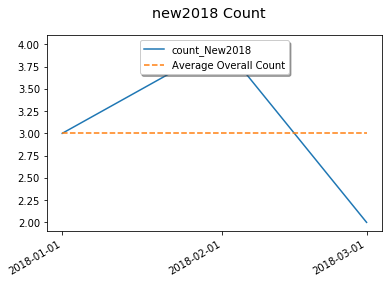

In [51]:
# Plotting TestingLoadFrame new2018 Count
basic_plot_generator("count_New2018", "new2018 Count" ,TestingLoadFrame.index, TestingLoadFrame,saveImage=True, fileName="Count_New2018")

## Conculsion

In this notebook we went over how to find the most popular hashtag for each date as well as by how much. This provides useful information as you can now trace what is a popular hashtag in your corpus. There are other functionalities and uses that can be applied to the tokenized hashtags. However, this notebook presents a common analysis. This notebook also showcases how to load back your dataframes that use "list", therefore removing the need to recompute the tokens.

### Note:

This notebook is one of the more advance notebooks in the TATR notebook series.